# Setup Code

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# imports
import torch
import torch.nn.functional as F
import numpy as np
import sys
import os
from matplotlib import pyplot as plt

In [3]:
# select devices
if torch.cuda.is_available():
    print("Good to go!")
    DEVICE = torch.device("cuda")
else:
    print("Bad to go!")
    DEVICE = torch.device("cpu")

Good to go!


Load config from config files.

In [4]:
# load config
sys.path.append(os.getcwd())
# choose between ship, lego
import configs.ship, configs.lego
sample_t: tuple = (2,6)
scale_factor = 2
# change config file here
config = configs.lego

Load the dataset and show the first one.

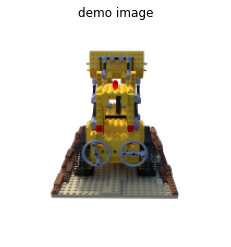

and its pose: 
[[-9.99902189e-01  4.19224519e-03 -1.33457193e-02 -5.37983216e-02]
 [-1.39886811e-02 -2.99659073e-01  9.53943670e-01  3.84547043e+00]
 [-4.65661287e-10  9.54037189e-01  2.99688309e-01  1.20808232e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [5]:
from nerf.data import load_blender
imgs, poses, int_mat = load_blender(config.datadir, device="cpu", scale_factor=scale_factor)
img_n, img_h, img_w = imgs.shape[:3]
# visualize
plt.imshow(np.array(imgs[0].to(device="cpu")))
plt.axis("off")
plt.title("demo image")
plt.show()
print("and its pose: ")
print(np.array(poses[0].to(device="cpu")))

# Test Functions

In [6]:
# compute rays
from nerf.graphics import compute_rays

rays_o, rays_d = compute_rays((img_h, img_w), int_mat, poses[0])
print("origin: ", rays_o[0,0])
print("normalized origin: ", F.normalize(rays_o[0,0], dim=0))
print("center of ray: ", rays_d[img_h//2,img_w//2])

origin:  tensor([-0.0538,  3.8455,  1.2081], dtype=torch.float64)
normalized origin:  tensor([-0.0133,  0.9539,  0.2997], dtype=torch.float64)
center of ray:  tensor([ 0.0133, -0.9539, -0.2997], dtype=torch.float64)


In [7]:
# query from rays
from nerf.graphics import queries_from_rays
samples = None
samples, depths = queries_from_rays(rays_o, rays_d, sample_t, 8)
print("samples[0, 0]: ", samples[0,0])
print("depths: ", depths)

samples[0, 0]:  tensor([[ 0.8616,  1.2645,  1.3150],
        [ 0.9506,  1.0135,  1.3254],
        [ 1.1346,  0.4949,  1.3468],
        [ 1.4110, -0.2843,  1.3791],
        [ 1.5600, -0.7045,  1.3965],
        [ 1.8227, -1.4452,  1.4272],
        [ 2.0642, -2.1262,  1.4554],
        [ 2.3128, -2.8271,  1.4844]], dtype=torch.float64)
depths:  tensor([[[2.4423, 2.6798, 3.1706,  ..., 5.0064, 5.6508, 6.3140],
         [2.2424, 3.0172, 3.2794,  ..., 5.1854, 5.9274, 6.3685],
         [2.4863, 2.6151, 3.5137,  ..., 5.0591, 5.8824, 6.1898],
         ...,
         [2.4114, 2.5739, 3.2610,  ..., 5.1431, 5.9166, 6.4264],
         [2.3259, 2.9294, 3.4618,  ..., 5.3076, 5.9222, 6.3132],
         [2.1532, 2.7756, 3.5997,  ..., 5.2463, 5.7097, 6.1157]],

        [[2.1463, 2.7204, 3.3537,  ..., 5.3538, 5.6168, 6.2465],
         [2.0404, 2.8665, 3.4707,  ..., 5.2461, 5.8783, 6.1762],
         [2.3086, 3.0017, 3.3748,  ..., 4.9085, 5.4519, 6.3125],
         ...,
         [2.1940, 3.0536, 3.5015,  ..., 5.

In [8]:
# test pos encode

from nerf.nerf_helper import *

L = 6
x = torch.tensor([[ 1.8013, -0.6242,  0.7009]])
# x = torch.tensor([ 1.8013, -0.6242,  0.7009])
enc_x = PosEncode(x, L, True)
# enc_xx = PosEncode1(x, L, True)
print(enc_x)
# print(enc_xx)




tensor([[ 1.8013,  0.9736, -0.2285, -0.4449, -0.8956,  0.7968,  0.6042,  0.9629,
         -0.2698, -0.5197, -0.8544,  0.8880,  0.4599, -0.6242, -0.5844,  0.8114,
         -0.9485,  0.3168, -0.6010, -0.7992,  0.9607,  0.2775,  0.5332, -0.8460,
         -0.9022,  0.4313,  0.7009,  0.6449,  0.7643,  0.9858,  0.1682,  0.3316,
         -0.9434, -0.6257,  0.7801, -0.9762,  0.2171, -0.4238, -0.9057]])


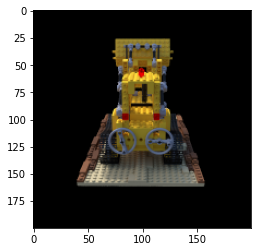

In [9]:
# test render from nerf
from nerf.graphics import render_from_nerf
fake_depth = torch.Tensor([1])
fake_nerf_output = imgs[0].cpu().reshape(img_h, img_w, 1, 4)
rgb, depth = render_from_nerf(fake_nerf_output, fake_depth)
plt.imshow(rgb)
plt.show()

# Train

In [10]:
# One iteration of TinyNeRF (forward pass).
# TODO train
# raise Exception("nothing wrong")


checkpoint found! Loading...
checkpoint loaded, i = 0
Iteration  0
Val loss:  tensor(0.1215, grad_fn=<MseLossBackward0>)


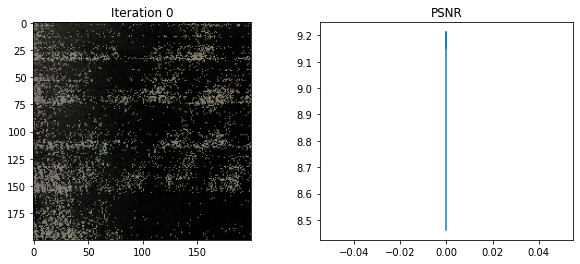

RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 15.78 GiB total capacity; 14.57 GiB already allocated; 1.50 MiB free; 14.57 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [11]:
from nerf.model import NeRF, TinyNeRF
from nerf.nerf_helper import nerf_iter_once, tinynerf_iter_once
import os.path

###### parameters
L_pos = 10
L_dir = 4

num_samples = 32
batch_size = 1 # increase batchsize if u have large GPU MEM
fc_width = 128
fc_depth = 4
skips = [2]

lr = 5e-4
# betas=(0.9, 0.999)
num_it = 10000
display_every = 200

###### models
model = NeRF(ch_in_pos=6*L_pos+3, ch_in_dir=6*L_dir+3, fc_width=fc_width, fc_depth=fc_depth, skips=skips)
# model = TinyNeRF(6*L_pos+3, fc_width=128)
model.to(DEVICE)
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=lr,
    # betas=betas,
)
seed = 9458
torch.manual_seed(seed)
np.random.seed(seed)
ckpt_path = 'nerf.pt'


###### load validation data
imgs_val, poses_val, int_mat_val = load_blender(config.datadir, data_type="val",scale_factor=2, device="cpu")
num_val = imgs_val.shape[0]
# val_idx = 1
# val_img = imgs[val_idx].to(DEVICE)
# val_c2w = poses[val_idx]

###### train
psnrs = []
its = []
i = 0

###### check saved checkpoints
if os.path.exists(ckpt_path):
    print("checkpoint found! Loading...")
    checkpoint = torch.load(ckpt_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    i = checkpoint['epoch']
    loss = checkpoint['loss']
    psnrs = checkpoint['psnrs']
    its = checkpoint['its']
    print("checkpoint loaded, i =",i)
else:
    print("No checkpoint found")

for i in range(i, num_it):
    gt_img_idx = np.random.randint(100)
    gt_img = imgs[gt_img_idx].clone().cpu()
    gt_c2w = poses[gt_img_idx].clone().to(DEVICE)

    pred_rgb,_ = nerf_iter_once(
                model,
                (img_h, img_w),
                int_mat.to(DEVICE),
                gt_c2w,
                sample_t,
                L_pos,
                L_dir,
                num_samples=num_samples,
                batch_size=batch_size
                )
    optimizer.zero_grad()
    loss = torch.nn.functional.mse_loss(pred_rgb, gt_img[...,:3])

    # print("train_it:", i, "img_idx: ", gt_img_idx, "loss:",float(loss))
    loss.backward()
    optimizer.step()

    if i % display_every == 0:
        val_idx = np.random.randint(num_val)
        val_img = imgs_val[val_idx].clone().cpu()
        val_c2w = poses_val[val_idx].clone().to(DEVICE)

        pred_rgb,_ = nerf_iter_once(
                model,
                (img_h, img_w),
                int_mat_val.to(DEVICE),
                val_c2w,
                sample_t,
                L_pos,
                L_dir,
                num_samples=num_samples,
                batch_size=batch_size
                )

        loss = torch.nn.functional.mse_loss(pred_rgb, val_img[...,:3])
        print("Iteration ", i)
        print("Val loss: ", loss)

        psnr = -10. * torch.log10(loss)
        psnrs.append(psnr.item())
        its.append(i)

        plt.figure(figsize=(10, 4))
        plt.subplot(121)
        img_np = pred_rgb.detach().cpu().numpy()
        plt.imshow(img_np)
        plt.title(f"Iteration {i}")
        plt.subplot(122)
        plt.plot(its, psnrs)
        plt.title("PSNR")
        plt.show()

        torch.save({
            'epoch': i,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            'psnrs': psnrs,
            'its': its
            }, ckpt_path)
        